# What is sentiment analysis?

Sentiment analysis is the detection of attitudes. For example:

* Movie: is this review positive or negative
* Products: what do people think about the new iPhone
* Public sentiment: how is consumer confidence, is despair increasing
* Politics: what do people think about this candidate or issue
* Prediction: predict election outcomes or market trends from sentiment

We will retrieve tweets on a given topic and check how positive or negative are people's opinion.

## Authenticate

In [1]:
import numpy as np
import pandas as pd
import tweepy

In [2]:
with open('.credentials.py') as f:
    exec(f.read())

print(API_KEY[:5])

ryi6W


In [3]:
# Authenticate
auth = tweepy.OAuthHandler(API_KEY, API_SECRET)
auth.set_access_token(ACCESS_TOKEN, ACCESS_TOKEN_SECRET)

api = tweepy.API(auth)
api.me().name

'A-mt'

## Retrieve tweets

In [4]:
import re
import csv

In [5]:
# Term to search and limit
searchTerm = input("Topic to search about: ")
nbTerm     = int(input("Nuber of tweets to search: "))

Topic to search about: biden
Nuber of tweets to search: 1000


In [6]:
# Cleanup text
def cleanTweet(txt):
    txt = re.sub("(@[A-Za-z0-9]+)"
                +"|([^0-9A-Za-z \t]) "
                +"| (\w +:\ / \ / \S +)", " ", txt)

    return ' '.join(txt.split())

In [7]:
# Search for tweets
tweets = tweepy.Cursor(api.search, q=searchTerm, lang="en") \
               .items(nbTerm)

# Save to CSV
csvFile   = open('results_' + searchTerm + '.csv', 'a')
csvWriter = csv.writer(csvFile)

for tweet in tweets:
    csvWriter.writerow([cleanTweet(tweet.text).encode('utf-8')])

csvFile.close()

In [8]:
!wc -l result*.csv

1000 results_biden.csv


## Analyze sentiment

In [9]:
from textblob import TextBlob

In [10]:
csvFile = open('results_' + searchTerm + '.csv', 'r')
reader  = csv.reader(csvFile)

sentiment = {
    'total'      : 0,
    'pos_weak'   : 0,
    'pos'        : 0,
    'pos_strong' : 0,
    'neg_weak'   : 0,
    'neg'        : 0,
    'neg_strong' : 0,
    'neutral'    : 0
}
n = 0

for row in reader:
    text = eval(row[0]).decode('utf-8')

    k = TextBlob(text).sentiment.polarity
    sentiment['total'] += k    
    n += 1

    if   k == 0:                 sentiment['neutral']    += 1
    elif k >  0   and k <= 0.3:  sentiment['pos_weak']   += 1
    elif k >  0.3 and k <= 0.6:  sentiment['pos']        += 1
    elif k >  0.6 and k <= 1.0:  sentiment['pos_strong'] += 1
    elif k > -0.3 and k <= 0:    sentiment['neg_weak']   += 1
    elif k > -0.6 and k <= -0.3: sentiment['neg']        += 1
    elif k > -1   and k <= -0.6: sentiment['neg_strong'] += 1

csvFile.close()

In [11]:
# Convert to percentages
sentiment_avg = {}

for k, val in sentiment.items():
    sentiment_avg[k] = sentiment[k] / n

sentiment_avg

{'total': 0.021064642180735994,
 'pos_weak': 0.119,
 'pos': 0.086,
 'pos_strong': 0.036,
 'neg_weak': 0.293,
 'neg': 0.036,
 'neg_strong': 0.012,
 'neutral': 0.415}

## Display report

In [12]:
title = ('How people are reacting about "{:s}"'
          + ' (based on {:d} tweets): ').format(searchTerm, n)
print(title)

k = sentiment_avg['total']

if   k == 0:                 print("Neutral")
elif k > 0    and k <= 0.3:  print("Weakly Positive")
elif k > 0.3  and k <= 0.6:  print("Positive")
elif k > 0.6  and k <= 1:    print("Strongly Positive")
elif k > -0.3 and k <= 0:    print("Weakly Negative")
elif k > -0.6 and k <= -0.3: print("Negative")
elif k > -1   and k <= -0.6: print("Strongly Negative")

How people are reacting about "biden" (based on 1000 tweets): 
Weakly Positive


In [14]:
import matplotlib.pyplot as plt

In [15]:
labels = [
    'Positive',
    'Weakly Positive',
    'Strongly Positive',
    'Neutral',
    'Negative',
    'Weakly Negative',
    'Strongly Negative'
]
sizes = [
    sentiment_avg['pos'],
    sentiment_avg['pos_weak'],
    sentiment_avg['pos_strong'],
    sentiment_avg['neutral'],
    sentiment_avg['neg'],
    sentiment_avg['neg_weak'],
    sentiment_avg['neg_strong']
]
colors = [
    'yellowgreen',
    'lightgreen',
    'darkgreen',
    'gold',
    'red',
    'lightsalmon',
    'darkred'
]

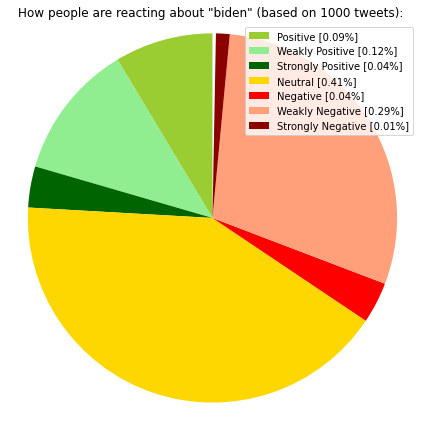

In [16]:
plt.figure(figsize=(6,6))

# Pie plot
patches, texts = plt.pie(sizes, colors=colors,
    startangle=90, normalize=False)

# Legend
labels_ = ['{:s} [{:.2f}%]'.format(l, sizes[i])
           for i,l in enumerate(labels)]
plt.legend(patches, labels_, loc='best')

plt.title(title)
plt.axis('equal')
plt.tight_layout()
plt.show()